In [1]:
import rastereasy

# Kmeans

## 1) read image

In [2]:
name_im='./data/demo/sentinel.tif'
Image=rastereasy.Geoimage(name_im)


In [3]:
help(Image.kmeans)

Help on method kmeans in module rastereasy.rastereasy:

kmeans(
    n_clusters=4,
    bands=None,
    random_state=None,
    dest_name=None,
    standardization=True,
    nb_points=1000
) method of rastereasy.rastereasy.Geoimage instance
    Perform K-means clustering on the image data.

    This method performs an unsupervised classification using K-means clustering,
    which groups pixels with similar spectral characteristics into a specified
    number of clusters.

    Parameters
    ----------
    n_clusters : int, optional
        Number of clusters (classes) to create.
        Default is 4.
    bands : list of str or None, optional
        List of bands to use for clustering. If None, all bands are used.
        Default is None.
    random_state : int or None, optional
        Random seed for reproducible results. If None, results may vary between runs.
        Default is RANDOM_STATE (defined globally).
    dest_name : str, optional
        Path to save the clustered image. If

## 2) kmeans with all bands with 4 clusters

<Figure size 640x480 with 0 Axes>

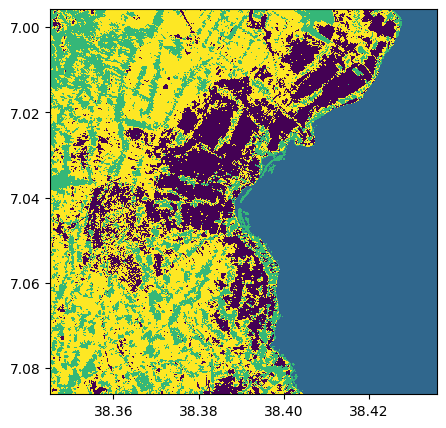

In [4]:
classif_all_bands,kmeans_model=Image.kmeans(n_clusters=4,random_state=None,nb_points=None)
classif_all_bands.visu()

## 2) kmeans with all bands with 10 clusters

<Figure size 640x480 with 0 Axes>

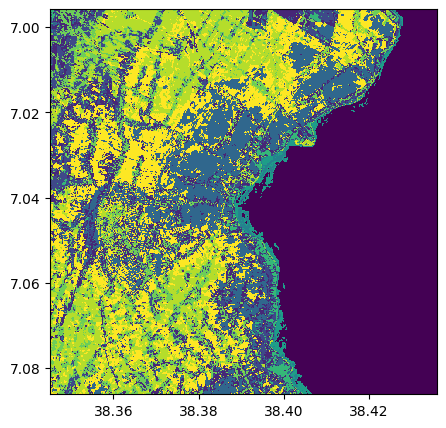

In [5]:
classif_all_bands_nostd,_=Image.kmeans(n_clusters=10,random_state=2,standardization=False,dest_name='./data/results/ML/KMeans/classif.tif')
classif_all_bands_nostd.visu()

## 3) kmeans with all bands with 5 clusters and 4 bands

<Figure size 640x480 with 0 Axes>

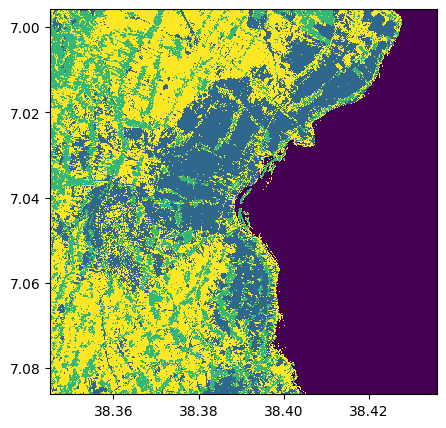

In [6]:
classif_all_bands_std,_=Image.kmeans(n_clusters=5,random_state=2,bands=["8",3,1,2],standardization=False)
classif_all_bands_std.visu()

# Learn a kmean on half on the image and apply it to the other part

## 1) Learn the kmean


<Figure size 640x480 with 0 Axes>

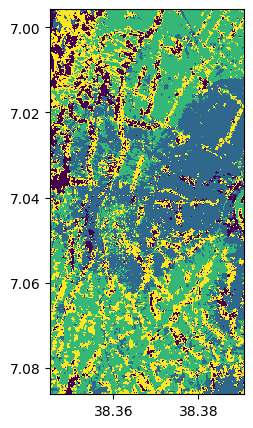

- Size of the image:
   - Rows (height): 1000
   - Cols (width): 500
   - Bands: 1
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04096778, 38.36795533)
- Driver: GTiff
- Data type: int32
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1}




In [7]:
classif_half1,model=Image.crop(0,1000,0,500).kmeans(n_clusters=4,nb_points=None)
classif_half1.visu()
classif_half1.info()

## 2) Apply the kmean


In [8]:
help(Image.apply_ML_model)


Help on method apply_ML_model in module rastereasy.rastereasy:

apply_ML_model(model, bands=None) method of rastereasy.rastereasy.Geoimage instance
    Apply a pre-trained machine learning model to the image.

    This method applies a machine learning model (such as one created by kmeans())
    to the image data, creating a new classified or transformed image.

    Parameters
    ----------
    model : tuple
        A tuple containing (ml_model, scaler) where:
        - ml_model: A trained scikit-learn model with a predict() method
        - scaler: The scaler used for standardization (or None if not used)
    bands : list of str or None, optional
        List of bands to use as input for the model. If None, all bands are used.
        Default is None.

    Returns
    -------
    Geoimage
        A new Geoimage containing the model output

    Examples
    --------
    >>> # Train a model on one image and apply to another
    >>> classified, model = reference_image.kmeans(n_clusters=

<Figure size 640x480 with 0 Axes>

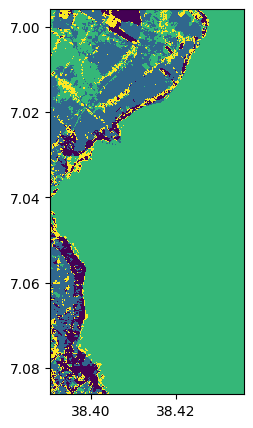

- Size of the image:
   - Rows (height): 1000
   - Cols (width): 500
   - Bands: 1
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04102677, 38.41322566)
- Driver: GTiff
- Data type: int32
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1}




In [9]:
classif_half2=Image.crop(0,1000,500,1000).apply_ML_model(model)
classif_half2.visu()
classif_half2.info()


## 3) Merge images

#### 1) Adjust size of images


- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 1
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int32
- Projection system: EPSG:32637
- Nodata: 0

- Given names for spectral bands: 
   {'1': 1}


- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 1
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int32
- Projection system: EPSG:32637
- Nodata: 0

- Given names for spectral bands: 
   {'1': 1}




<Figure size 640x480 with 0 Axes>

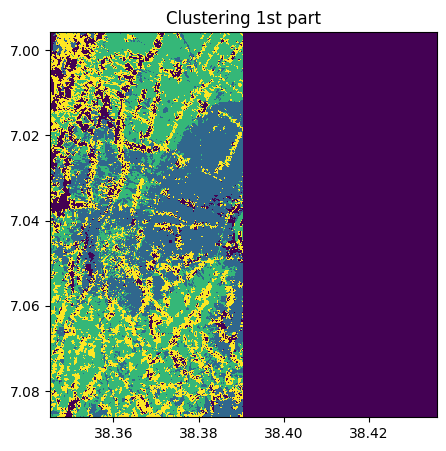

<Figure size 640x480 with 0 Axes>

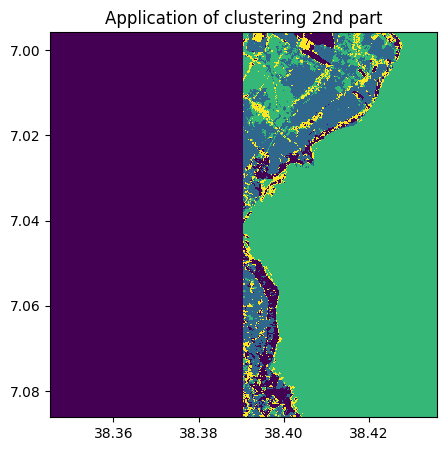

In [10]:
classif1 ,classif2=rastereasy.extend_common_areas(classif_half1,classif_half2)
classif1.info()
classif2.info()
classif1.visu(title='Clustering 1st part')
classif2.visu(title='Application of clustering 2nd part')  


#### 2) Merge images


- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 1
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int32
- Projection system: EPSG:32637
- Nodata: 0

- Given names for spectral bands: 
   {'1': 1}




<Figure size 640x480 with 0 Axes>

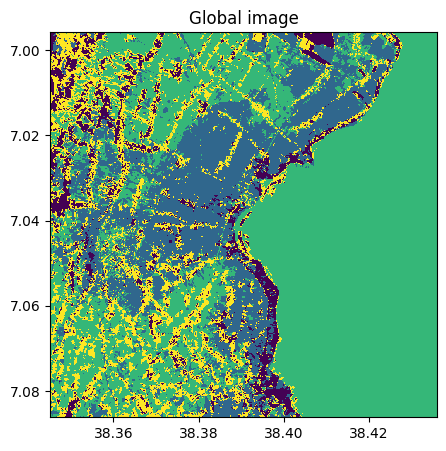

In [11]:
classif_all=classif1+classif2
classif_all.info()
classif_all.save('./data/results/ML/KMeans/cluster_all.tif')
classif_all.visu(title='Global image')